## Convolutional Neural Networks to identify clothing attributes
Here I replace the last layer of inception model with multiple fully connected layers each trained to recognise a particular attriubute. Initially the data is preprocessed and each fully connected neural network is for a specific attribute.

In [1]:
#Importing tensorflow and numpy
import tensorflow as tf
import numpy as np
import sklearn 
import tensorflow.python.platform
from tensorflow.python.platform import gfile
import os
import re

In [2]:
#initializing the imagenet directory and training images directory
model_dir = "imagenet"
attribute_training_images = "ClothingAttributeDataset/images/"

In [3]:
#This function is from classify_image.py which creates graph from saved GraphDef file and returns a saver
def create_graph():
  """Creates a graph from saved GraphDef file and returns a saver."""
  # Creates graph from saved graph_def.pb.
  with tf.gfile.FastGFile(os.path.join(
      model_dir, 'classify_image_graph_def.pb'), 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    _ = tf.import_graph_def(graph_def, name='')

In [4]:
#Function to generate bottleneck values from classifyimage.py
def get_bottleneck_values(images):  # modifying name of function
  """Runs inference on an image.

  Args:
    image: Image file name.

  Returns:
    Nothing
  """
  # Creates graph from saved GraphDef.
  create_graph()
  feature_vector_size = 2048 # pool_3:0 contains a float description vector of size 2048  
  with tf.Session() as sess:
    # Some useful tensors:
    # 'softmax:0': A tensor containing the normalized prediction across
    #   1000 labels.
    # 'pool_3:0': A tensor containing the next-to-last layer containing 2048
    #   float description of the image.
    # 'DecodeJpeg/contents:0': A tensor containing a string providing JPEG
    #   encoding of the image.
    # Runs the softmax tensor by feeding the image_data as input to the graph.
    bottleneck_tensor = sess.graph.get_tensor_by_name('pool_3:0') #changing from softmax:0 to pool_3:0
    feature_vectors = np.empty([len(images),2048])
    image_names = []
    for i,image in enumerate(images): # Iterating through images 
        image_data = tf.gfile.FastGFile(image, 'rb').read()
        feature_vector = sess.run(bottleneck_tensor,
                           {'DecodeJpeg/contents:0': image_data})
        feature_vector = np.squeeze(feature_vector)
        image_names.append(image)
        feature_vectors[i,:] = feature_vector 
        if(i % 10 == 0): #Print out just to see the function is processing 
            print("Processing image %d  %s"%(i,image))
    return feature_vectors,image_names

In [5]:
import pickle
feature_vectors_sorted = pickle.load(open('feature_vectors_sorted','rb'))
image_name_sorted = pickle.load(open('image_names_sorted','rb'))

In [6]:
import pandas as pd
sleeve_len = pd.read_csv('ClothingAttributeDataset/labels/sleeve_length.csv',header=None)
pattern_stripe = pd.read_csv('ClothingAttributeDataset/labels/pattern_stripe.csv',header=None)
collar = pd.read_csv('ClothingAttributeDataset/labels/collar.csv',header=None)
pattern_graphics = pd.read_csv('ClothingAttributeDataset/labels/pattern_graphics.csv',header=None)
white_color = pd.read_csv('ClothingAttributeDataset/labels/white.csv',header=None)
yellow_color = pd.read_csv('ClothingAttributeDataset/labels/yellow.csv',header=None)
skin_exposure = pd.read_csv('ClothingAttributeDataset/labels/skin_exposure.csv',header=None)
red_color = pd.read_csv('ClothingAttributeDataset/labels/red.csv',header=None)
blue_color = pd.read_csv('ClothingAttributeDataset/labels/blue.csv',header=None)
cyan_color = pd.read_csv('ClothingAttributeDataset/labels/cyan.csv',header=None)
grey_color = pd.read_csv('ClothingAttributeDataset/labels/gray.csv',header=None)
black_color = pd.read_csv('ClothingAttributeDataset/labels/black.csv',header=None)
brown_color = pd.read_csv('ClothingAttributeDataset/labels/brown.csv',header=None)
green_color = pd.read_csv('ClothingAttributeDataset/labels/green.csv',header=None)
scarf = pd.read_csv('ClothingAttributeDataset/labels/scarf.csv',header=None)
gender = pd.read_csv('ClothingAttributeDataset/labels/gender.csv',header=None)
purple_color = pd.read_csv('ClothingAttributeDataset/labels/purple.csv',header=None)
necktie = pd.read_csv('ClothingAttributeDataset/labels/necktie.csv',header=None)
placket = pd.read_csv('ClothingAttributeDataset/labels/placket.csv',header=None)
category = pd.read_csv('ClothingAttributeDataset/labels/category.csv',header=None)
neckline = pd.read_csv('ClothingAttributeDataset/labels/neckline.csv',header=None)
many_colors = pd.read_csv('ClothingAttributeDataset/labels/many_colors.csv',header=None)
pattern_spot = pd.read_csv('ClothingAttributeDataset/labels/pattern_spot.csv',header=None)
pattern_solid = pd.read_csv('ClothingAttributeDataset/labels/pattern_solid.csv',header=None)
pattern_floral = pd.read_csv('ClothingAttributeDataset/labels/pattern_floral.csv',header=None)
pattern_placid = pd.read_csv('ClothingAttributeDataset/labels/pattern_placid.csv',header=None)

In [7]:
sleeve_len.fillna(0, inplace=True)
pattern_stripe.fillna(0, inplace=True)
collar.fillna(0, inplace=True)
pattern_graphics.fillna(0, inplace=True)
white_color.fillna(0, inplace=True)
yellow_color.fillna(0, inplace=True)
skin_exposure.fillna(0, inplace=True)
red_color.fillna(0, inplace=True)
blue_color.fillna(0, inplace=True)
black_color.fillna(0, inplace=True)
cyan_color.fillna(0, inplace=True)
grey_color.fillna(0, inplace=True)
brown_color.fillna(0, inplace=True)
green_color.fillna(0, inplace=True)
scarf.fillna(0, inplace=True)
gender.fillna(0, inplace=True)
purple_color.fillna(0, inplace=True)
neckline.fillna(0, inplace=True)
necktie.fillna(0, inplace=True)
placket.fillna(0, inplace=True)
category.fillna(0, inplace=True)
many_colors.fillna(0, inplace=True)
pattern_spot.fillna(0, inplace=True)
pattern_solid.fillna(0, inplace=True)
pattern_floral.fillna(0, inplace=True)
pattern_placid.fillna(0, inplace=True)

In [8]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [9]:
def getFullyConnectedLayer(no_of_categories):
    nn = Sequential()
    nn.add(Dense(256,input_dim=2048,activation = 'relu'))
    nn.add(Dropout(0.5))
    nn.add(Dense(output_dim=no_of_categories, activation='softmax'))
    nn.compile(optimizer='adadelta', loss='categorical_crossentropy',metrics=['accuracy'])
    return nn

In [10]:
def trainFullyConnectedLayer(neural_network,X,Y):
    nb_epoch=80
    Y_Categorical = to_categorical(Y,nb_classes=None)
    neural_network.fit(X, Y_Categorical, validation_split = 0.33,
              nb_epoch=nb_epoch, batch_size=32)
    return neural_network

In [19]:
sleeve_len_nn = getFullyConnectedLayer(4)
sleeve_len_nn = trainFullyConnectedLayer(sleeve_len_nn,feature_vectors_sorted,sleeve_len)
sleeve_len_nn.save_weights('sleeve_weights.h5')

Train on 1243 samples, validate on 613 samples
Epoch 1/80
1243/1243 [==============================] - 1s - loss: 0.7487 - acc: 0.7667 - val_loss: 0.9962 - val_acc: 0.5416

In [13]:
white_color_nn = getFullyConnectedLayer(3)
white_color_nn = trainFullyConnectedLayer(white_color_nn,feature_vectors_sorted,white_color)
white_color_nn.save_weights('white_col_weights.h5')

Train on 1243 samples, validate on 613 samples
Epoch 1/80
1243/1243 [==============================] - 1s - loss: 0.8661 - acc: 0.6597 - val_loss: 0.7782 - val_acc: 0.6542

In [14]:
black_color_nn = getFullyConnectedLayer(3)
black_color_nn = trainFullyConnectedLayer(black_color_nn,feature_vectors_sorted,black_color)
black_color_nn.save_weights('black_col_weights.h5')

Train on 1243 samples, validate on 613 samples
Epoch 1/80
1243/1243 [==============================] - 1s - loss: 0.9899 - acc: 0.5575 - val_loss: 0.7158 - val_acc: 0.6998

In [24]:
yellow_color_nn = getFullyConnectedLayer(3)
yellow_color_nn = trainFullyConnectedLayer(yellow_color_nn,feature_vectors_sorted,yellow_color)
yellow_color_nn.save_weights('yellow_color.h5')

Train on 1243 samples, validate on 613 samples
Epoch 1/80
1243/1243 [==============================] - 1s - loss: 0.5436 - acc: 0.8705 - val_loss: 0.3104 - val_acc: 0.9347

In [15]:
red_color_nn = getFullyConnectedLayer(3)
red_color_nn = trainFullyConnectedLayer(red_color_nn,feature_vectors_sorted,red_color)
red_color_nn.save_weights('red_col_weights.h5')

Train on 1243 samples, validate on 613 samples
Epoch 1/80
1243/1243 [==============================] - 1s - loss: 0.4963 - acc: 0.8640 - val_loss: 0.5533 - val_acc: 0.8809

In [16]:
blue_color_nn = getFullyConnectedLayer(3)
blue_color_nn = trainFullyConnectedLayer(blue_color_nn,feature_vectors_sorted,blue_color)
blue_color_nn.save_weights('blue_col_weights.h5')

Train on 1243 samples, validate on 613 samples
Epoch 1/80
1243/1243 [==============================] - 1s - loss: 0.6731 - acc: 0.8190 - val_loss: 0.4050 - val_acc: 0.8972

In [17]:
pattern_stripe_nn = getFullyConnectedLayer(3)
pattern_stripe_nn = trainFullyConnectedLayer(pattern_stripe_nn,feature_vectors_sorted,pattern_stripe)
pattern_stripe_nn.save_weights('pattern_stripe_weights.h5')

Train on 1243 samples, validate on 613 samples
Epoch 1/80
1243/1243 [==============================] - 1s - loss: 0.6428 - acc: 0.8029 - val_loss: 0.7386 - val_acc: 0.8042

In [18]:
pattern_graphics_nn = getFullyConnectedLayer(3)
pattern_graphics_nn = trainFullyConnectedLayer(pattern_graphics_nn,feature_vectors_sorted,pattern_graphics)
pattern_graphics_nn.save_weights('pattern_graphics_weight.nn')

Train on 1243 samples, validate on 613 samples
Epoch 1/80
1243/1243 [==============================] - 1s - loss: 0.3715 - acc: 0.9099 - val_loss: 0.8106 - val_acc: 0.8287

In [19]:
collor_nn = getFullyConnectedLayer(3)
collor_nn = trainFullyConnectedLayer(collor_nn,feature_vectors_sorted,collar)
collor_nn.save_weights('collor_weights.h5')

Train on 1243 samples, validate on 613 samples
Epoch 1/80
1243/1243 [==============================] - 1s - loss: 1.0159 - acc: 0.5487 - val_loss: 0.8014 - val_acc: 0.6868 - ETA: 0s - loss: 1.0364 - acc: 0.5547

In [20]:
skin_exp_nn = getFullyConnectedLayer(3)
skin_exp_nn = trainFullyConnectedLayer(skin_exp_nn,feature_vectors_sorted,skin_exposure)
skin_exp_nn.save_weights('skin_exp_weights.h5')

Train on 1243 samples, validate on 613 samples
Epoch 1/80
1243/1243 [==============================] - 1s - loss: 0.5382 - acc: 0.8335 - val_loss: 0.8204 - val_acc: 0.6362

In [21]:
grey_color_nn = getFullyConnectedLayer(3)
grey_color_nn = trainFullyConnectedLayer(grey_color_nn,feature_vectors_sorted,grey_color)
grey_color_nn.save_weights('grey_col_weights.h5')

Train on 1243 samples, validate on 613 samples
Epoch 1/80
1243/1243 [==============================] - 1s - loss: 0.8945 - acc: 0.6677 - val_loss: 0.5903 - val_acc: 0.8189

In [22]:
green_color_nn = getFullyConnectedLayer(3)
green_color_nn = trainFullyConnectedLayer(green_color_nn,feature_vectors_sorted,green_color)
green_color_nn.save_weights('green_col_weights.h5')

Train on 1243 samples, validate on 613 samples
Epoch 1/80
1243/1243 [==============================] - 1s - loss: 0.5453 - acc: 0.8656 - val_loss: 0.3837 - val_acc: 0.9086

In [23]:
cyan_color_nn = getFullyConnectedLayer(3)
cyan_color_nn = trainFullyConnectedLayer(cyan_color_nn,feature_vectors_sorted,cyan_color)
cyan_color_nn.save_weights('cyan_col_weights.h5')

Train on 1243 samples, validate on 613 samples
Epoch 1/80
1243/1243 [==============================] - 1s - loss: 0.5386 - acc: 0.8632 - val_loss: 0.4409 - val_acc: 0.9021 - ETA: 0s - loss: 0.5421 - acc: 0.8474

In [24]:
brown_color_nn = getFullyConnectedLayer(3)
brown_color_nn = trainFullyConnectedLayer(brown_color_nn,feature_vectors_sorted,brown_color)
brown_color_nn.save_weights('brown_col_weights.h5')

Train on 1243 samples, validate on 613 samples
Epoch 1/80
1243/1243 [==============================] - 1s - loss: 0.7205 - acc: 0.7860 - val_loss: 0.3992 - val_acc: 0.9152

In [25]:
purple_color_nn = getFullyConnectedLayer(3)
purple_color_nn = trainFullyConnectedLayer(purple_color_nn,feature_vectors_sorted,purple_color)
purple_color_nn.save_weights('purple_col_weights.h5')

Train on 1243 samples, validate on 613 samples
Epoch 1/80
1243/1243 [==============================] - 1s - loss: 0.4784 - acc: 0.8801 - val_loss: 0.4121 - val_acc: 0.9054

In [26]:
many_colors_nn = getFullyConnectedLayer(3)
many_colors_nn = trainFullyConnectedLayer(many_colors_nn,feature_vectors_sorted,many_colors)
many_colors_nn.save_weights('many_cols_weights.h5')

Train on 1243 samples, validate on 613 samples
Epoch 1/80
1243/1243 [==============================] - 1s - loss: 0.5372 - acc: 0.8568 - val_loss: 0.6985 - val_acc: 0.7341

In [27]:
pattern_spot_nn = getFullyConnectedLayer(3)
pattern_spot_nn = trainFullyConnectedLayer(pattern_spot_nn,feature_vectors_sorted,pattern_spot)
pattern_spot_nn.save_weights('pattern_spot_weights.h5')

Train on 1243 samples, validate on 613 samples
Epoch 1/80
1243/1243 [==============================] - 1s - loss: 0.4959 - acc: 0.8624 - val_loss: 0.6393 - val_acc: 0.8483

In [28]:
pattern_solid_nn = getFullyConnectedLayer(3)
pattern_solid_nn = trainFullyConnectedLayer(pattern_solid_nn,feature_vectors_sorted,pattern_solid)
pattern_solid_nn.save_weights('pattern_solid_weights.h5')

Train on 1243 samples, validate on 613 samples
Epoch 1/80
1243/1243 [==============================] - 1s - loss: 0.8426 - acc: 0.6452 - val_loss: 1.7488 - val_acc: 0.2920

In [29]:
pattern_floral_nn = getFullyConnectedLayer(3)
pattern_floral_nn = trainFullyConnectedLayer(pattern_floral_nn,feature_vectors_sorted,pattern_floral)
pattern_floral_nn.save_weights('pattern_floral_weights.h5')

Train on 1243 samples, validate on 613 samples
Epoch 1/80
1243/1243 [==============================] - 1s - loss: 0.4571 - acc: 0.8584 - val_loss: 0.6254 - val_acc: 0.8777

In [30]:
pattern_placid_nn = getFullyConnectedLayer(3)
pattern_placid_nn = trainFullyConnectedLayer(pattern_placid_nn,feature_vectors_sorted,pattern_placid)
pattern_placid_nn.save_weights('pattern_placid_weights.h5')

Train on 1243 samples, validate on 613 samples
Epoch 1/80
1243/1243 [==============================] - 1s - loss: 0.4897 - acc: 0.8729 - val_loss: 0.5615 - val_acc: 0.8679

In [31]:
scarf_nn = getFullyConnectedLayer(3)
scarf_nn = trainFullyConnectedLayer(scarf_nn,feature_vectors_sorted,scarf)
scarf_nn.save_weights('scarf_weights.h5')

Train on 1243 samples, validate on 613 samples
Epoch 1/80
1243/1243 [==============================] - 1s - loss: 0.8466 - acc: 0.6991 - val_loss: 0.5911 - val_acc: 0.8352

In [32]:
gender_nn = getFullyConnectedLayer(3)
gender_nn = trainFullyConnectedLayer(gender_nn,feature_vectors_sorted,gender)
gender_nn.save_weights('gender_weights.h5')

Train on 1243 samples, validate on 613 samples
Epoch 1/80
1243/1243 [==============================] - 1s - loss: 0.7848 - acc: 0.6581 - val_loss: 0.6141 - val_acc: 0.7390

In [34]:
category_nn = getFullyConnectedLayer(8)
category_nn = trainFullyConnectedLayer(category_nn,feature_vectors_sorted,category)
category_nn.save_weights('category_weights.h5')

Train on 1243 samples, validate on 613 samples
Epoch 1/80
1243/1243 [==============================] - 1s - loss: 1.6460 - acc: 0.4529 - val_loss: 1.7855 - val_acc: 0.3556

In [35]:
necktie_nn = getFullyConnectedLayer(3)
necktie_nn = trainFullyConnectedLayer(necktie_nn,feature_vectors_sorted,necktie)
necktie_nn.save_weights('necktie_weights.h5')

Train on 1243 samples, validate on 613 samples
Epoch 1/80
1243/1243 [==============================] - 1s - loss: 0.6437 - acc: 0.7908 - val_loss: 0.3166 - val_acc: 0.9086

In [36]:
neckline_nn = getFullyConnectedLayer(4)
neckline_nn = trainFullyConnectedLayer(neckline_nn,feature_vectors_sorted,neckline)
neckline_nn.save_weights('neckline_weights.h5')

Train on 1243 samples, validate on 613 samples
Epoch 1/80
1243/1243 [==============================] - 1s - loss: 1.3985 - acc: 0.3677 - val_loss: 1.2819 - val_acc: 0.3899

In [37]:
placket_nn = getFullyConnectedLayer(3)
placket_nn = trainFullyConnectedLayer(placket_nn,feature_vectors_sorted,placket)
placket_nn.save_weights('placket_weights.h5')

Train on 1243 samples, validate on 613 samples
Epoch 1/80
1243/1243 [==============================] - 1s - loss: 0.6755 - acc: 0.7305 - val_loss: 0.6017 - val_acc: 0.8042

In [14]:
def predictAttributes(image):
    sleve_len_nn = getFullyConnectedLayer(4);
    sleve_len_nn.load_weights("sleeve_weights.h5")
    sleeve_prediction = sleve_len_nn.predict(image)
    sleeve_labels = ["Not sure","No Sleeves","Half Sleeves", "Full sleeves"]
    printPredictions(sleeve_prediction, sleeve_labels)
    
    white_color_nn = getFullyConnectedLayer(3)
    #white_color_nn = trainFullyConnectedLayer(white_color_nn,feature_vectors_sorted,white_color)
    white_color_nn.load_weights('white_col_weights.h5')
    white_prediction = white_color_nn.predict(image)
    white_color_labels = ["Pretty confusing to tell if its white Sorry","Not white", "White"]
    printPredictions(white_prediction, white_color_labels)
    
    pattern_stripe_nn = getFullyConnectedLayer(3)
    #pattern_stripe_nn = trainFullyConnectedLayer(pattern_stripe_nn,feature_vectors_sorted,pattern_stripe)
    pattern_stripe_nn.load_weights('pattern_stripe_weights.h5')
    pattern_strip_prediction = pattern_stripe_nn.predict(image)
    pattern_strip_labels = ["Not sure buddy", "Striped", "No Stripes"]
    printPredictions(pattern_strip_prediction, pattern_strip_labels)
    
    pattern_graphics_nn = getFullyConnectedLayer(3)
    #pattern_graphics_nn = trainFullyConnectedLayer(pattern_graphics_nn,feature_vectors_sorted,pattern_graphics)
    pattern_graphics_nn.load_weights('pattern_graphics_weight.nn')
    pattern_graphics_prediction = pattern_graphics_nn.predict(image)
    pattern_graphics_labels = ["Not sure buddy", "No Graphics", "Graphics"]
    printPredictions(pattern_graphics_prediction, pattern_graphics_labels)
    
    yellow_color_nn = getFullyConnectedLayer(3)
    #yellow_color_nn = trainFullyConnectedLayer(yellow_color_nn,feature_vectors_sorted,yellow_color)
    yellow_color_nn.load_weights('yellow_color.h5')
    yellow_prediction = yellow_color_nn.predict(image)
    yellow_color_labels = ["Pretty confusing to tell if its yellow Sorry","Not yellow", "Yellow"]
    printPredictions(yellow_prediction, yellow_color_labels)
    
    skin_exp_nn = getFullyConnectedLayer(3)
    #skin_exp_nn = trainFullyConnectedLayer(skin_exp_nn,feature_vectors_sorted,skin_exposure)
    skin_exp_nn.load_weights('skin_exp_weights.h5')
    skin_ex_prediction = white_color_nn.predict(image)
    skin_ex_labels = ["I cant tell","You are covered", "Might get tanned"]
    printPredictions(skin_ex_prediction, skin_ex_labels)
    
    collor_nn = getFullyConnectedLayer(3)
    #collor_nn = trainFullyConnectedLayer(collor_nn,feature_vectors_sorted,collar)
    collor_nn.load_weights('collor_weights.h5')
    collar_prediction = white_color_nn.predict(image)
    collar_labels = ["Not sure","No Collar", "Collar"]
    printPredictions(collar_prediction, collar_labels)
    
    purple_color_nn = getFullyConnectedLayer(3)
    purple_color_nn.load_weights('purple_col_weights.h5')
    purple_prediction = purple_color_nn.predict(image)
    purple_color_labels = ["Not sure","Not purple", "Purple"]
    printPredictions(purple_prediction, purple_color_labels)
    
    brown_color_nn = getFullyConnectedLayer(3)
    brown_color_nn.load_weights('brown_col_weights.h5')
    brown_prediction = brown_color_nn.predict(image)
    brown_color_labels = ["Not sure","Not brown", "brown"]
    printPredictions(brown_prediction, brown_color_labels)
 
    cyan_color_nn = getFullyConnectedLayer(3)
    cyan_color_nn.load_weights('cyan_col_weights.h5')
    cyan_prediction = cyan_color_nn.predict(image)
    cyan_color_labels = ["Not sure","Not cyan", "cyan"]
    printPredictions(cyan_prediction, cyan_color_labels)
 
    green_color_nn = getFullyConnectedLayer(3)
    green_color_nn.load_weights('green_col_weights.h5')
    green_prediction = green_color_nn.predict(image)
    green_color_labels = ["Not sure","Not green", "green"]
    printPredictions(green_prediction, green_color_labels)
 
    blue_color_nn = getFullyConnectedLayer(3)
    blue_color_nn.load_weights('blue_col_weights.h5')
    blue_prediction = blue_color_nn.predict(image)
    blue_color_labels = ["Not sure","Not blue", "blue"]
    printPredictions(blue_prediction, blue_color_labels)
 
    black_color_nn = getFullyConnectedLayer(3)
    black_color_nn.load_weights('black_col_weights.h5')
    black_prediction = black_color_nn.predict(image)
    black_color_labels = ["Not sure","Not black", "black"]
    printPredictions(black_prediction, black_color_labels)
 
    many_cols_color_nn = getFullyConnectedLayer(3)
    many_cols_color_nn.load_weights('many_cols_weights.h5')
    many_cols_prediction = many_cols_color_nn.predict(image)
    many_cols_color_labels = ["Not sure","Not many_cols", "many_cols"]
    printPredictions(many_cols_prediction, many_cols_color_labels)
 
    pattern_floral_nn = getFullyConnectedLayer(3)
    pattern_floral_nn.load_weights('pattern_floral_weights.h5')
    pattern_floral_prediction = pattern_floral_nn.predict(image)
    pattern_floral_labels = ["Not sure buddy", "No floral", "Ohhh floral"]
    printPredictions(pattern_floral_prediction, pattern_floral_labels)
    
    pattern_placid_nn = getFullyConnectedLayer(3)
    pattern_placid_nn.load_weights('pattern_placid_weights.h5')
    pattern_placid_prediction = pattern_placid_nn.predict(image)
    pattern_placid_labels = ["Not sure buddy", "No placid", "Ohhh placid"]
    printPredictions(pattern_placid_prediction, pattern_placid_labels)
    
    pattern_spot_nn = getFullyConnectedLayer(3)
    pattern_spot_nn.load_weights('pattern_spot_weights.h5')
    pattern_spot_prediction = pattern_spot_nn.predict(image)
    pattern_spot_labels = ["Not sure", "No spot", "Spot"]
    printPredictions(pattern_spot_prediction, pattern_spot_labels)
 
    scarf_nn = getFullyConnectedLayer(3)
    scarf_nn.load_weights('scarf_weights.h5')
    scarf_prediction = white_color_nn.predict(image)
    scarf_labels = ["Not sure","No scarf", "scarf"]
    printPredictions(scarf_prediction, scarf_labels)
 
    gender_nn = getFullyConnectedLayer(3)
    gender_nn.load_weights('gender_weights.h5')
    gender_prediction = white_color_nn.predict(image)
    gender_labels = ["Not Sure","Men", "Women"]
    printPredictions(gender_prediction, gender_labels)

In [15]:
def printPredictions(prediction, labels):
    top_k = prediction[0].argsort()[-len(prediction[0]):][::-1]
    
    for node_id in top_k:
        human_string = labels[node_id]
        score = prediction[0][node_id]
        print('%s (score = %.5f)' % (human_string, score))
    print('\n')

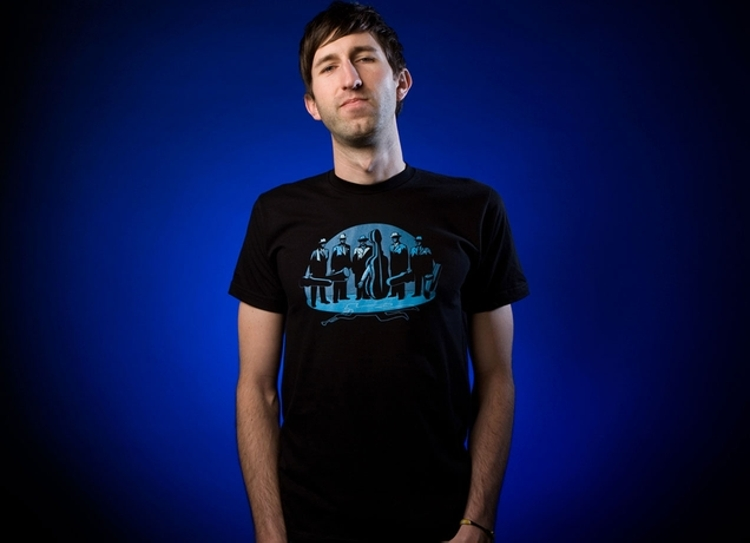

In [38]:
from IPython.display import Image,display
display(Image(image_name_sorted[1695]))

In [16]:
a = feature_vectors_sorted[1695:1696,:]
predictAttributes(a)

Half Sleeves (score = 0.97729)
No Sleeves (score = 0.02205)
Not sure (score = 0.00051)
Full sleeves (score = 0.00015)


Not white (score = 0.90159)
White (score = 0.07621)
Pretty confusing to tell if its white Sorry (score = 0.02219)


Striped (score = 0.89930)
No Stripes (score = 0.10067)
Not sure buddy (score = 0.00002)


Graphics (score = 0.95941)
No Graphics (score = 0.03961)
Not sure buddy (score = 0.00098)


Not yellow (score = 0.99681)
Pretty confusing to tell if its yellow Sorry (score = 0.00316)
Yellow (score = 0.00003)


You are covered (score = 0.90159)
Might get tanned (score = 0.07621)
I cant tell (score = 0.02219)


No Collar (score = 0.90159)
Collar (score = 0.07621)
Not sure (score = 0.02219)


Not purple (score = 0.99208)
Not sure (score = 0.00739)
Purple (score = 0.00052)


Not brown (score = 0.99872)
Not sure (score = 0.00128)
brown (score = 0.00000)


Not cyan (score = 0.99982)
Not sure (score = 0.00018)
cyan (score = 0.00000)


Not green (score = 0.99527)
Not sure 